In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import configparser
import time
# load warp imgaug function
from aug_func import get_fn
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

# **圖像增強 (image augmentation)**

In [2]:
# load image
test_img = cv2.imread('./test.jpg')

# load augmentation config
config = configparser.ConfigParser()
# 內容有中文需增加encoding項
config.read('./aug_config', encoding='UTF-8')

# load augmentation function
aug = get_fn(config)

Use AddElementwise
Use GaussianNoise
Use LaplaceNoise
Use MultiplyElementwise
Use GaussianBlur
Use AverageBlur
Use MedianBlur
Use MultiplyAndAddToBrightness
Use GammaContrast
Use SigmoidContrast
Use LogContrast
Use LinearContrast
Use HistogramEqualization
Use Affine
Use MotionBlur
Use JpegCompression
Use Fliplr
Use Flipud


## **單個圖像增強**

use time:0.47197437286376953


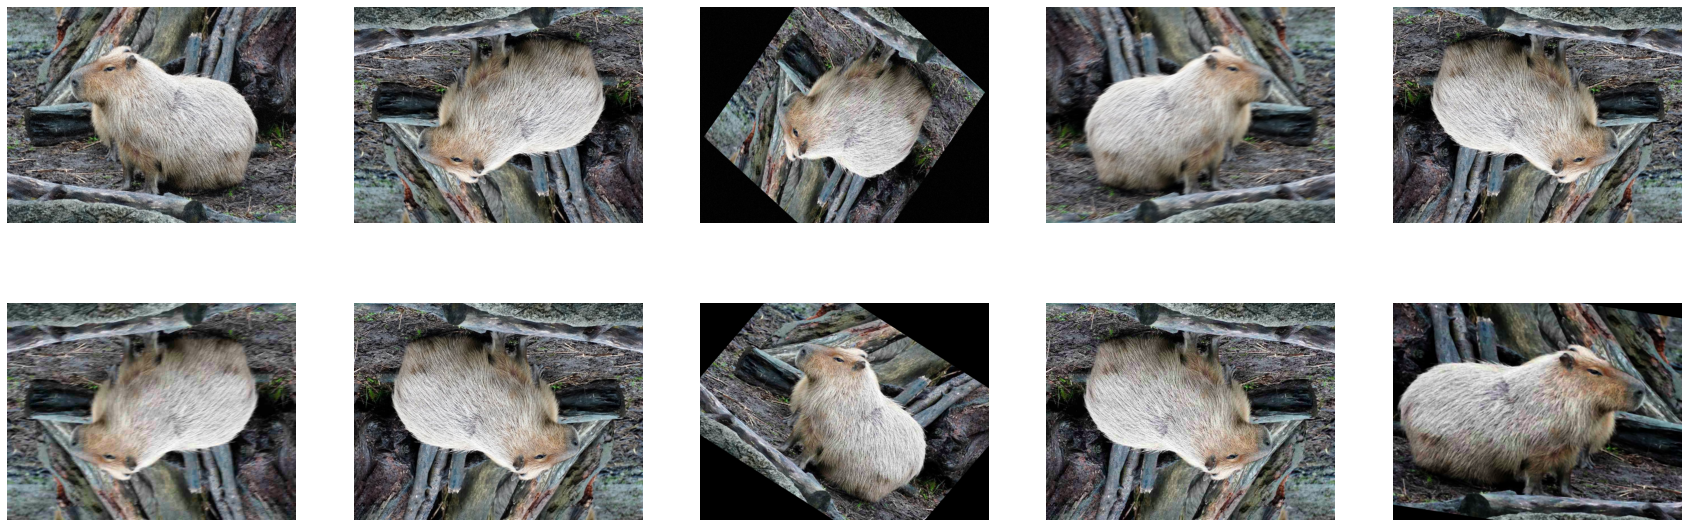

In [3]:
start_time = time.time()
plt.figure(figsize=(30, 10))
for i in range(1,11):
    result_img = aug(image=test_img)
    result_img = np.array(result_img)
    plt.subplot(2,5,i)
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
print('use time:{}'.format(time.time() - start_time))

## **批次增強**

use time:0.4510185718536377
<class 'numpy.ndarray'>


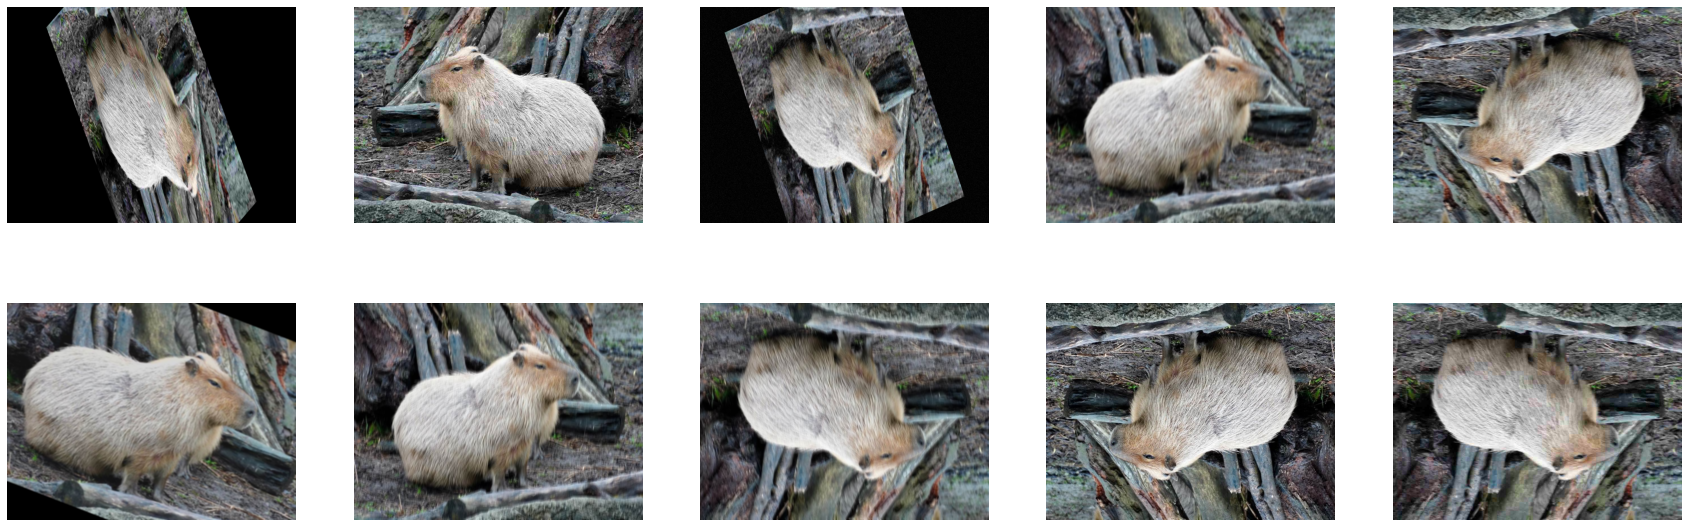

In [4]:
# 創建10張影像的batch
expand_image = np.expand_dims(test_img, 0)
batch_img = expand_image
for i in range(0,9):
    batch_img = np.vstack([batch_img, expand_image])

start_time = time.time()
# 批次處理
result_batch = aug(images=batch_img)
plt.figure(figsize=(30, 10))
for i in range(len(batch_img)):
    plt.subplot(2,5,i+1)
    plt.imshow(cv2.cvtColor(result_batch[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
print('use time:{}'.format(time.time() - start_time))
print(type(result_batch))

## **包含bounding box的增強**

In [5]:
# 假設設兩個bounding boxes在圖像上形成(2,4)的nparray
# x1:108 y1:133 x2:815 y2:703
# x1:626 y1:202 x2:687 y2:247
bb = np.array([[108, 133, 815, 703], [626, 202, 687, 247]])

# 創建一個空list存放bbs資訊
bbs_l = []
for i in range(len(bb)):
    bbs_l.append(BoundingBox(x1=bb[i,0], y1=bb[i,1], x2=bb[i,2], y2=bb[i,3]))

# 創建轉換類別
bbs = BoundingBoxesOnImage(bbs_l, shape=test_img.shape)

(-0.5, 1023.5, 767.5, -0.5)

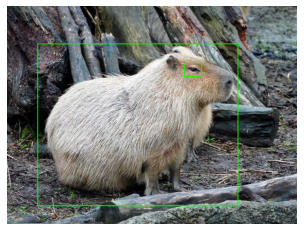

In [6]:
# 原始圖上的bounding box
draw_img = test_img.copy()
for i in range(len(bb)):
    cv2.rectangle(draw_img, (bb[i, 0], bb[i, 1]), (bb[i, 2], bb[i, 3]), (0, 255, 0), 2)
plt.figure()
plt.imshow(cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

use time:0.49718618392944336


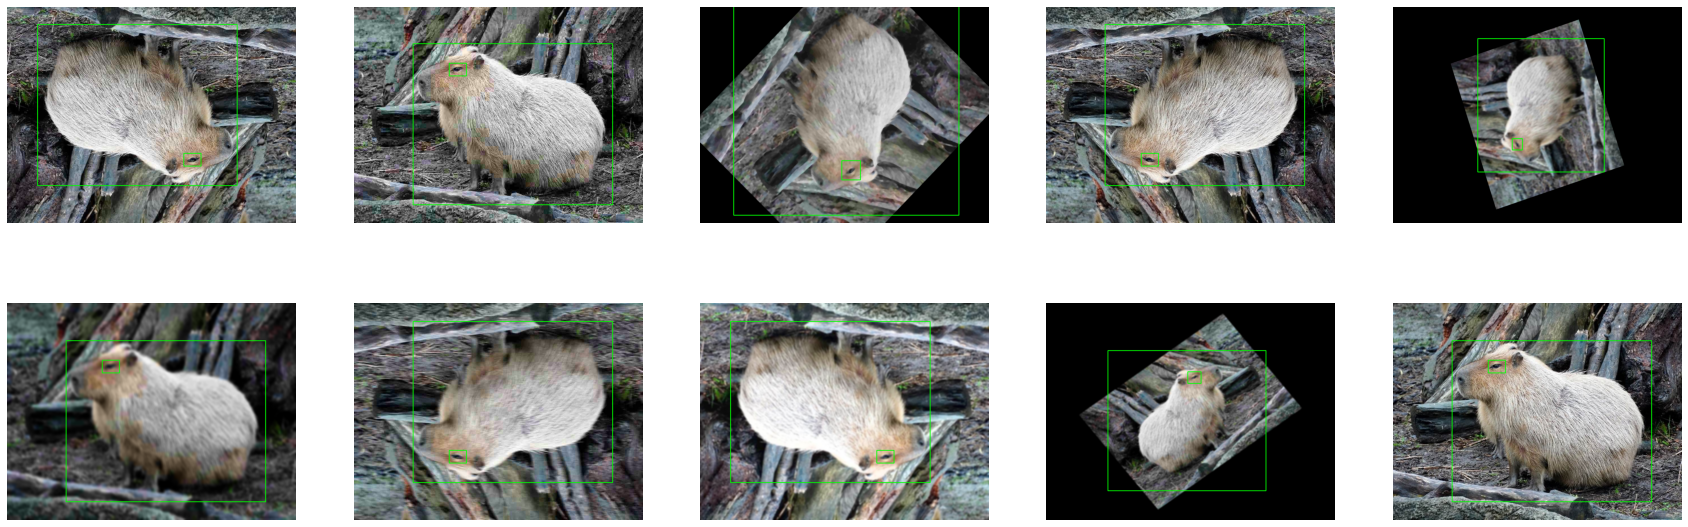

In [7]:
# augmentation 後的bbox

start_time = time.time()
plt.figure(figsize=(30, 10))
for i in range(1,11):
    result_img, result_bbs = aug(image=test_img, bounding_boxes=bbs)
    # 將影像轉至nparray，不然使用OpenCV畫圖會出問題
    result_img = np.array(result_img)
    # 移除和裁減超過邊界的眶
    clip_result = result_bbs.remove_out_of_image().clip_out_of_image()
    # draw bounding box
    for j in range(len(clip_result)):
        cv2.rectangle(result_img, (int(clip_result[j].x1), int(clip_result[j].y1)), (int(clip_result[j].x2), int(clip_result[j].y2)), (0, 255, 0), 2)
    plt.subplot(2,5,i)
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
print('use time:{}'.format(time.time() - start_time))
